In [55]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

import os
from tensorflow.keras.preprocessing.image import load_img, img_to_array
from sklearn.model_selection import train_test_split

import tensorflow as tf
from tensorflow import keras

In [56]:
no_path = '/kaggle/input/brain-mri-images-for-brain-tumor-detection/no'
yes_path = '/kaggle/input/brain-mri-images-for-brain-tumor-detection/yes'

# Function to load images and create labels
def load_images_from_folder(folder, label):
    images = []
    labels = []
    for filename in os.listdir(folder):
        img_path = os.path.join(folder, filename)
        img = load_img(img_path, target_size=(500, 500))
        img_array = img_to_array(img)
        images.append(img_array)
        labels.append(label)
    return np.array(images), np.array(labels)

# Load images and create labels
no_images, no_labels = load_images_from_folder(no_path, 0)
yes_images, yes_labels = load_images_from_folder(yes_path, 1)

In [57]:
# Combine and split the data into training and testing sets
images = np.concatenate((no_images, yes_images), axis=0)
labels = np.concatenate((no_labels, yes_labels), axis=0)

# Create a combined array of images and labels
combined = list(zip(images, labels))

# Shuffle the combined data
np.random.shuffle(combined)

# Separate images and labels after shuffling
shuffled_images, shuffled_labels = zip(*combined)

# Convert back to numpy arrays
shuffled_images = np.array(shuffled_images)
shuffled_labels = np.array(shuffled_labels)

In [58]:
x_train, x_test, y_train, y_test = train_test_split(shuffled_images, shuffled_labels, test_size=0.2, random_state=42)

# Normalize the images
x_train = x_train / 255.0
x_test = x_test / 255.0

In [59]:
# Verify the shapes
print(f"x_train shape: {x_train.shape}")
print(f"y_train shape: {y_train.shape}")
print(f"x_test shape: {x_test.shape}")
print(f"y_test shape: {y_test.shape}")

x_train shape: (202, 500, 500, 3)
y_train shape: (202,)
x_test shape: (51, 500, 500, 3)
y_test shape: (51,)


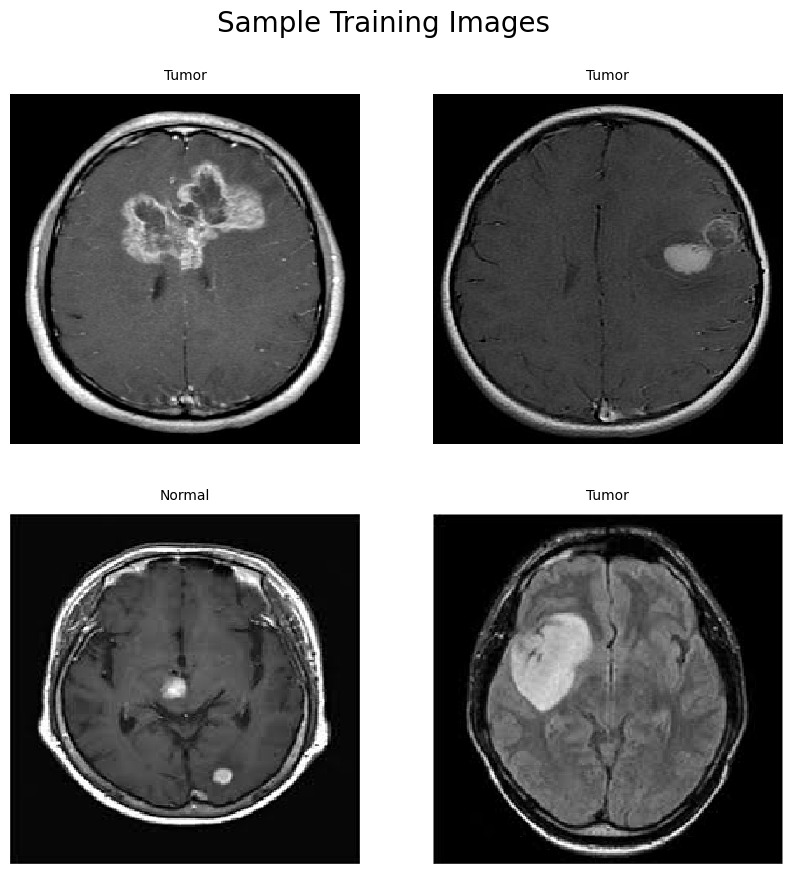

In [60]:
import matplotlib.pyplot as plt

# Define label names
label_names = {0: 'Normal', 1: 'Tumor'}

fig, axes = plt.subplots(2, 2, figsize=(10, 10))

fig.text(0.5, 0.95, "Sample Training Images", horizontalalignment='center', verticalalignment='center', fontsize=20)

for i, ax in enumerate(axes.flat):
    ax.matshow(x_train[i])
    label = label_names[y_train[i]]  # Get label name from label_names dictionary
    ax.text(0.5, 1.05, label, horizontalalignment='center', verticalalignment='center', transform=ax.transAxes)
    ax.axis('off')

plt.show()

In [61]:
x_train.shape

(202, 500, 500, 3)

In [62]:
x_test_flattened = x_test.reshape(len(x_test),500*500*3)

In [63]:
import os
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers

In [64]:
import os
from tensorflow import keras
from tensorflow.keras import layers

# Set XLA flags to disable XLA devices (optional)
os.environ['TF_XLA_FLAGS'] = '--tf_xla_enable_xla_devices=false'

# Define the model architecture
model = keras.Sequential([
    layers.Conv2D(32, (3, 3), activation='relu'),
    layers.MaxPooling2D((2, 2)),
    layers.Conv2D(64, (3, 3), activation='relu'),
    layers.MaxPooling2D((2, 2)),
    layers.Conv2D(128, (3, 3), activation='relu'),
    layers.MaxPooling2D((2, 2)),
    layers.Conv2D(128, (3, 3), activation='relu'),
    layers.MaxPooling2D((2, 2)),
    layers.Flatten(),
    layers.Dense(256, activation='relu'),
    layers.Dropout(0.5),
    layers.Dense(128, activation='relu'),
    layers.Dropout(0.5),
    layers.Dense(64, activation='relu'),
    layers.Dense(32, activation='relu'),
    layers.Dense(16, activation='relu'),
    layers.Dense(8, activation='relu'),
    layers.Dense(1, activation='sigmoid') 
])

# Compile the model
model.compile(
    optimizer=keras.optimizers.Adam(learning_rate=1e-4),  # Adjust learning rate if needed
    loss='binary_crossentropy',  # Binary cross-entropy loss for binary classification
    metrics=['accuracy']  # Monitor accuracy during training
)

# Train the model
model.fit(x_train, y_train, epochs=50, validation_data=(x_test, y_test))

Epoch 1/50
7/7 ━━━━━━━━━━━━━━━━━━━━ 14s 941ms/step - accuracy: 0.5970 - loss: 0.6658 - val_accuracy: 0.6863 - val_loss: 0.5656
Epoch 2/50
7/7 ━━━━━━━━━━━━━━━━━━━━ 1s 147ms/step - accuracy: 0.5994 - loss: 0.6105 - val_accuracy: 0.7059 - val_loss: 0.5739
Epoch 3/50
7/7 ━━━━━━━━━━━━━━━━━━━━ 1s 147ms/step - accuracy: 0.6005 - loss: 0.6058 - val_accuracy: 0.8039 - val_loss: 0.5202
Epoch 4/50
7/7 ━━━━━━━━━━━━━━━━━━━━ 1s 148ms/step - accuracy: 0.6179 - loss: 0.5657 - val_accuracy: 0.8627 - val_loss: 0.5173
Epoch 5/50
7/7 ━━━━━━━━━━━━━━━━━━━━ 1s 148ms/step - accuracy: 0.5899 - loss: 0.5747 - val_accuracy: 0.8039 - val_loss: 0.4843
Epoch 6/50
7/7 ━━━━━━━━━━━━━━━━━━━━ 1s 148ms/step - accuracy: 0.6384 - loss: 0.5383 - val_accuracy: 0.8627 - val_loss: 0.4810
Epoch 7/50
7/7 ━━━━━━━━━━━━━━━━━━━━ 1s 148ms/step - accuracy: 0.6376 - loss: 0.5461 - val_accuracy: 0.8627 - val_loss: 0.4835
Epoch 8/50
7/7 ━━━━━━━━━━━━━━━━━━━━ 1s 146ms/step - accuracy: 0.6236 - loss: 0.5523 - val_accuracy: 0.8824 - val_loss

In [65]:
model.evaluate(x_test,y_test)

2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 37ms/step - accuracy: 0.8903 - loss: 0.5202 


[0.4973825216293335, 0.8823529481887817]

In [66]:
y_pred = model.predict(x_test)

2/2 ━━━━━━━━━━━━━━━━━━━━ 1s 382ms/step


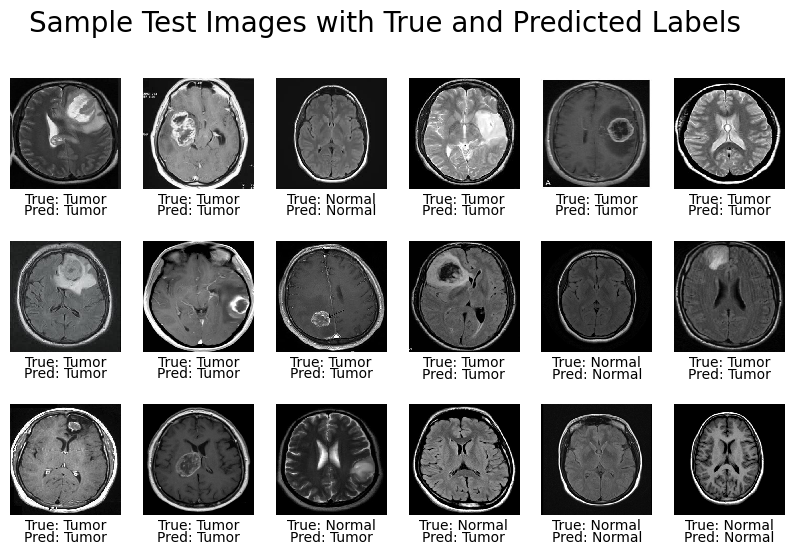

In [67]:
import numpy as np
import matplotlib.pyplot as plt

# Define label names
label_names = {0: 'Normal', 1: 'Tumor'}

# Visualize sample images along with true and predicted labels
fig, axes = plt.subplots(3,6, figsize=(10, 6))
fig.text(0.5, 0.95, "Sample Test Images with True and Predicted Labels", horizontalalignment='center', verticalalignment='center', fontsize=20)

for i, ax in enumerate(axes.flat):
    # Reshape the flattened image to its original shape (512, 512, 3)
    original_shape_image = x_test_flattened[i].reshape((500, 500, 3))
    
    # Display the test image
    ax.matshow(original_shape_image)
    
    # True label
    true_label = label_names[y_test[i]]  
    # Predicted label
    if y_pred[i] > 0.5:
        pred_label = 'Tumor'
    else:
        pred_label = 'Normal'
    
    # Display true and predicted labels
    ax.text(0.5, -0.1, f"True: {true_label}", horizontalalignment='center', verticalalignment='center', transform=ax.transAxes)
    ax.text(0.5, -0.2, f"Pred: {pred_label}", horizontalalignment='center', verticalalignment='center', transform=ax.transAxes)
    
    ax.axis('off')

plt.show()
